# #  [Link](https://www.kaggle.com/datasets/thedevastator/the-ultimate-netflix-tv-shows-and-movies-dataset)

# 1 Cargar el dataset

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para realizar ditintos tipos de diagramas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import mitosheet


In [2]:
# Dataset sin procesar de Peliculas y shows
#df_raw_movies = pd.read_csv("Data Netflix Tv/raw_titles.csv")

# Dataset de mejores peliculas y shows de Netflix por año
#df_best_movies_by_year = pd.read_csv("Data Netflix Tv/Best Movie by Year Netflix.csv")
#df_best_shows_by_year = pd.read_csv("Data Netflix Tv/Best Show by Year Netflix.csv")


# Dataset de mejores peliculas y shows de Netflix
df_best_movies_netflix = pd.read_csv("Data_Netflix/Best Movies Netflix.csv")
df_best_shows_netflix = pd.read_csv("Data_Netflix/Best Shows Netflix.csv")




In [3]:
# tipos de datos de las columnas
df_best_movies_netflix.dtypes

index                int64
TITLE               object
RELEASE_YEAR         int64
SCORE              float64
NUMBER_OF_VOTES      int64
DURATION             int64
MAIN_GENRE          object
MAIN_PRODUCTION     object
dtype: object

In [4]:
# Verficamos que no exitan datos nulos en las columnas.
df_best_movies_netflix.isnull().any()

index              False
TITLE              False
RELEASE_YEAR       False
SCORE              False
NUMBER_OF_VOTES    False
DURATION           False
MAIN_GENRE         False
MAIN_PRODUCTION    False
dtype: bool

In [5]:
# Ordenar por columnas
df_best_movies_netflix.sort_values(
                        by=['NUMBER_OF_VOTES', 'SCORE' ],
                        ascending=False,
                        inplace=True )

Borrar columna 'index'

In [6]:
df_best_movies_netflix.drop('index', axis=1, inplace=True)

In [7]:
# Mostra inforamcion preeliminar del dataset.
df_best_movies_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 311
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TITLE            387 non-null    object 
 1   RELEASE_YEAR     387 non-null    int64  
 2   SCORE            387 non-null    float64
 3   NUMBER_OF_VOTES  387 non-null    int64  
 4   DURATION         387 non-null    int64  
 5   MAIN_GENRE       387 non-null    object 
 6   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 24.2+ KB


# 2 Data visualization

## Hipotesis
1. [x] ¿Cuáles son los generos más populares?
2. [x] ¿Cuál es el título de la película más votada en el dataset?
3. [x] ¿Cuál es la película más larga del dataset en términos de duración?
4. [x] ¿Cuáles son las películas con una puntuación de 8.5 o más en el dataset?
5. [x] ¿Cuáles son las películas producidas por la compañía de producción principal "Main Production"?
6. [x] ¿Cuáles son las películas del género principal "Comedia" en el dataset y su puntuacion?
7. [ ] ¿Cuál es la película más recientemente lanzada en el dataset?
8. [ ] ¿Cuáles son las películas con más de 50.000 votos en el dataset?
9. [ ]  ¿Cuál ha sido la película más votada en cada género principal en cada año desde el año de lanzamiento hasta la actualidad?
10. [ ] ¿Cuál ha sido el género principal más popular en cada año desde el año de lanzamiento hasta la actualidad en función del número de votos recibidos?
11. [ ] ¿Cuáles han sido las producciones principales con el mayor número de películas lanzadas en cada género principal en cada año desde el año de      lanzamiento hasta la actualidad?  
12.  [ ]  ¿Cuál ha sido la producción principal más exitosa en términos de puntuación media en cada género principal?
13.  [ ]  ¿Cuál ha sido el título de la película con la puntuación más alta en cada año desde el año de lanzamiento hasta la actualidad?
14.  [ ]  ¿Hay alguna relación entre el año de lanzamiento y la puntuación de la película en función del número de votos recibidos?
15.  [ ]  ¿Cuál ha sido el género principal con la mayor puntuación media en cada año desde el año de lanzamiento hasta la actualidad?
16.  [ ]  ¿Hay algún patrón en la duración de las películas con puntuaciones más altas en cada género principal?
17.  [ ]  ¿Cuál ha sido la película más votada en cada producción principal en cada año desde el año de lanzamiento hasta la actualidad?
18.  [ ]  ¿Cuál ha sido la producción principal con el mayor número de películas de más de dos horas de duración en cada género principal?


In [8]:
df_best_movies_netflix

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
6,Django Unchained,2012,8.4,1472668,165,western,US
5,Saving Private Ryan,1998,8.6,1346020,169,drama,US
16,Taxi Driver,1976,8.3,795222,113,crime,US
...,...,...,...,...,...,...,...
219,Bully,2011,7.4,10266,92,drama,US
122,Berserk: The Golden Age Arc II - The Battle fo...,2012,7.7,10257,80,fantasy,JP
150,Gifted Hands: The Ben Carson Story,2009,7.6,10210,86,drama,US
320,Luck by Chance,2009,7.1,10206,155,romance,IN


## 2.0 Generos más populares.
Los generos más papulares son todos aquellos que tinen más apariciónes

In [9]:
# lista de estilos
# print(mpl.style.available)

# Utlizar un estilo para todas las graficas
mpl.style.use("seaborn-darkgrid")

Crearemos una funcion para hacer **anotaciones** en las barras del los graficos, nos ahorra muchas lineas de codigo.

In [10]:
def annot_bar(ax:pd.DataFrame, orient:dict[str:int]=None):
    """Helps to add annotations to bar charts, on the Vertical and Horizontal axes.

    Parameters:
    
      orient (dict[str:int], optional): The axis of the annotations. If not specified, the default value is None.
        1: Vertical.
        0: Horizontal.
        
      ax (pd.DataFrame): Bars of the chart.

    Example:
        >>> import seaborn as sns
        >>> ax = sns.barplot(x=[1, 2, 3], y=[10, 20, 30])
        >>> annot_bar(graphic=ax, orient={'texto': 1})
    """

       
    try:
        
        # Anotaciones de tipo STR
        if "texto" in orient:
             # Annotations on the Vertical axis '|'
            if orient["texto"]  == 1:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_x() + p.get_width() / 2.,
                        p.get_height(),
                        '%d' % int(p.get_height()),
                        fontsize=12,
                        color='black',
                        ha='center',
                        va='bottom',
                    );

            # Annotations on the Horizontal axis '__'
            elif orient["texto"] == 0:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_width(),
                        p.get_y() + p.get_height() / 2.,
                        '%d' % int(p.get_width()),
                        fontsize=12,
                        color='black',
                        ha='left',
                        va='center',
                    );


        # Anotaciones de tipo FLOAT
        elif "numerico" in orient:
             # Annotations on the Vertical axis '|'
            if orient["numerico"] == 1:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_x() + p.get_width() / 2.,
                        p.get_height(),
                        p.get_height(),
                        fontsize=12,
                        color='black',
                        ha='center',
                        va='bottom',
                    );

            # Annotations on the Horizontal axis '__'
            elif orient["numerico"]  == 0:
                # We iterate over each bar
                for p in ax.patches:
                    ax.text(
                        p.get_width(),
                        p.get_y() + p.get_height() / 2.,
                        p.get_width(),
                        fontsize=12,
                        color='black',
                        ha='left',
                        va='center',
                    );
    except Exception as e:
        pass
        
    # We return all the bars with their annotation
    return ax


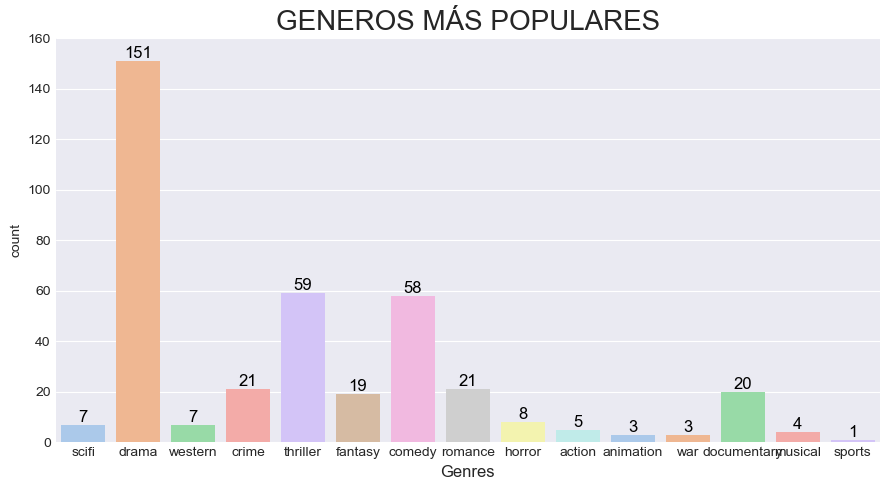

In [11]:
# Definimos una figura y un Axes para graficar.
fig, ax = plt.subplots(figsize=(9, 5), tight_layout=True)

# Grafico categorico de barras.
plot = sns.countplot(data=df_best_movies_netflix, x="MAIN_GENRE", ax=ax, palette="pastel"); 


# funicon de anotaciones. 
annot_bar(ax = plot, orient = {"texto": 1});

# Agregar titulo
ax.set_title(label="GENEROS MÁS POPULARES", fontdict= dict(fontsize=20, verticalalignment = 'baseline' ) );

# Nuevos nombre del eje X
ax.set_xlabel("Genres", fontsize=12)

# agregar limite al eje Y
plt.ylim(0, 160);

plt.savefig("grafico.png")

>  Puede observar que el genero más popular es el de **'drama'**. Eso quiere decir que existen **151 peliculas que pertecen a ese genero**

##  2.1 ¿Cuál es el título de la película más votada en el dataset?

In [12]:
# Eleginmos las 5 peliculas con más puntuacion
top_movies = df_best_movies_netflix.loc[:, ["TITLE", "NUMBER_OF_VOTES", "RELEASE_YEAR"] ].head(3)
top_movies

,TITLE,NUMBER_OF_VOTES,RELEASE_YEAR
1,Inception,2268288,2010
2,Forrest Gump,1994599,1994
6,Django Unchained,1472668,2012


Creación de graficos y personalización

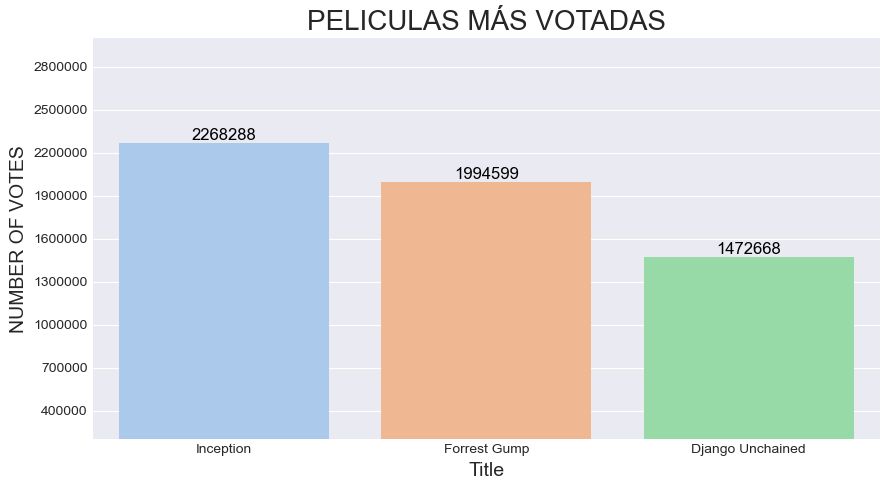

In [13]:
# Personalizar tamaño del Axes
fig, ax = plt.subplots(figsize=(9, 5), tight_layout=True)

# Grafico de categorico
plot = sns.barplot(
    
    data = top_movies, 
    y = "NUMBER_OF_VOTES",
    x = "TITLE",
    palette="pastel");



# Establecer las marcas y etiquetas del eje Y
yticks = np.arange(100000, 3000000, 300000)
yticklabels = ['{}'.format(ytick) for ytick in yticks]

# Agrgando los t
plot.set_yticks(yticks )
plot.set_yticklabels(yticklabels);


# Establecer un limite del eje Y
plot.set_ylim(200000, 3000000);


# Agregar notas a cada barra del grafico
annot_bar(plot, {"texto": 1});

# Agregar titulo
plot.set_title("PELICULAS MÁS VOTADAS", fontsize = 20);


# Personalizar etiqueta del eje Y
plt.ylabel("NUMBER OF VOTES", fontsize = 14);

# Personalizar eqtiqueta del eje X
plt.xlabel("Title", fontsize = 14);


> **Inception** es la Pelicula más votada

## 2.3 ¿Cuál es la película más larga del dataset en términos de duración?

In [14]:
# Peliculas con una duracion mayor a 200
top_duration_movies = df_best_movies_netflix.query(expr="DURATION > 200")

# Agrupar los datos por título de película y calcular la duración media para cada película
top_duration_movies = top_duration_movies.groupby('TITLE')['DURATION'].mean()
top_duration_movies

TITLE
Hum Aapke Hain Koun..!               206.0
Jodhaa Akbar                         213.0
Kabhi Khushi Kabhie Gham             210.0
Lagaan: Once Upon a Time in India    224.0
Once Upon a Time in America          229.0
The Irishman                         209.0
Name: DURATION, dtype: float64

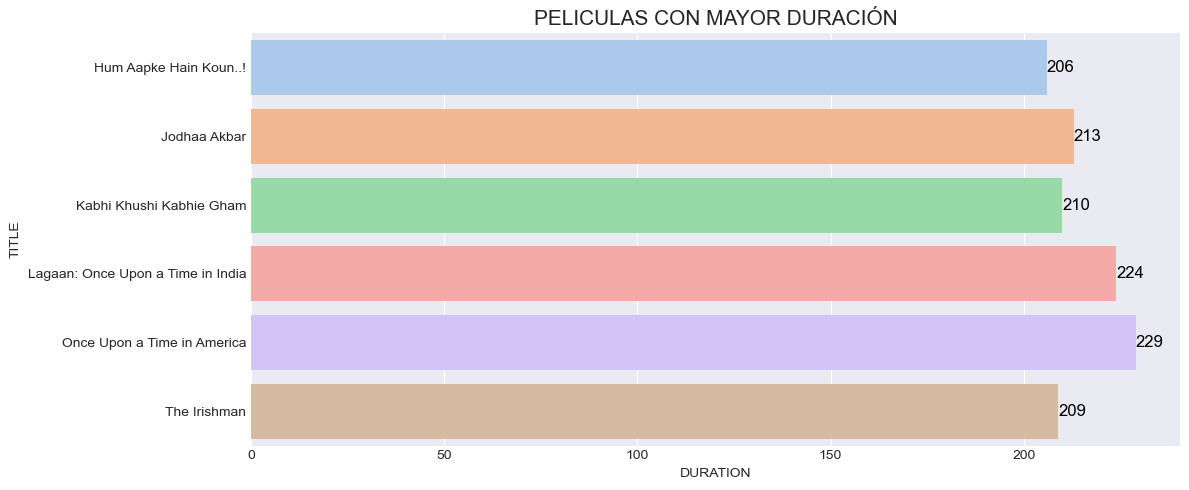

In [15]:
# Perzonalizar el el tamaño del axes con Matplolib
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

# Crear grafico de barra con Seaborn
ax = sns.barplot( 
    y = top_duration_movies.index,
    x = top_duration_movies.values,
    palette="pastel",
    ax = ax
           );


# Agrgramos el tiempo de duracion de la pelicula a cada barra.
annot_bar(ax, {"texto":0});


# Agregar titullo y label en el eje X
ax.set_title("PELICULAS CON MAYOR DURACIÓN", fontsize=15);

plt.xlabel("DURATION");


> La pelicula con mayor duracion en el dataset es **Once Upon a Time in America**

## 2.4 ¿Cuáles son las películas con una puntuación de 8.5 o más en el dataset?

Películas con **puntuacíon igual o mayor a 8**

In [16]:
# Realizar query donde la puntuación sea mayor a 8.
scores_greater_than_8 = df_best_movies_netflix[["TITLE", "SCORE"]].query(expr="SCORE >= 8.5")

# Organizar las puntuaciónes de mayor a menor 
scores_greater_than_8.sort_values(by="SCORE", ascending=True, inplace=True)
scores_greater_than_8



,TITLE,SCORE
5,Saving Private Ryan,8.6
4,Bo Burnham: Inside,8.7
3,Anbe Sivam,8.7
1,Inception,8.8
2,Forrest Gump,8.8
0,David Attenborough: A Life on Our Planet,9.0


Realizar **grafico de de barras barplot()**, para representar las pelicuas con **puntaje mayor o igual a 8.5**

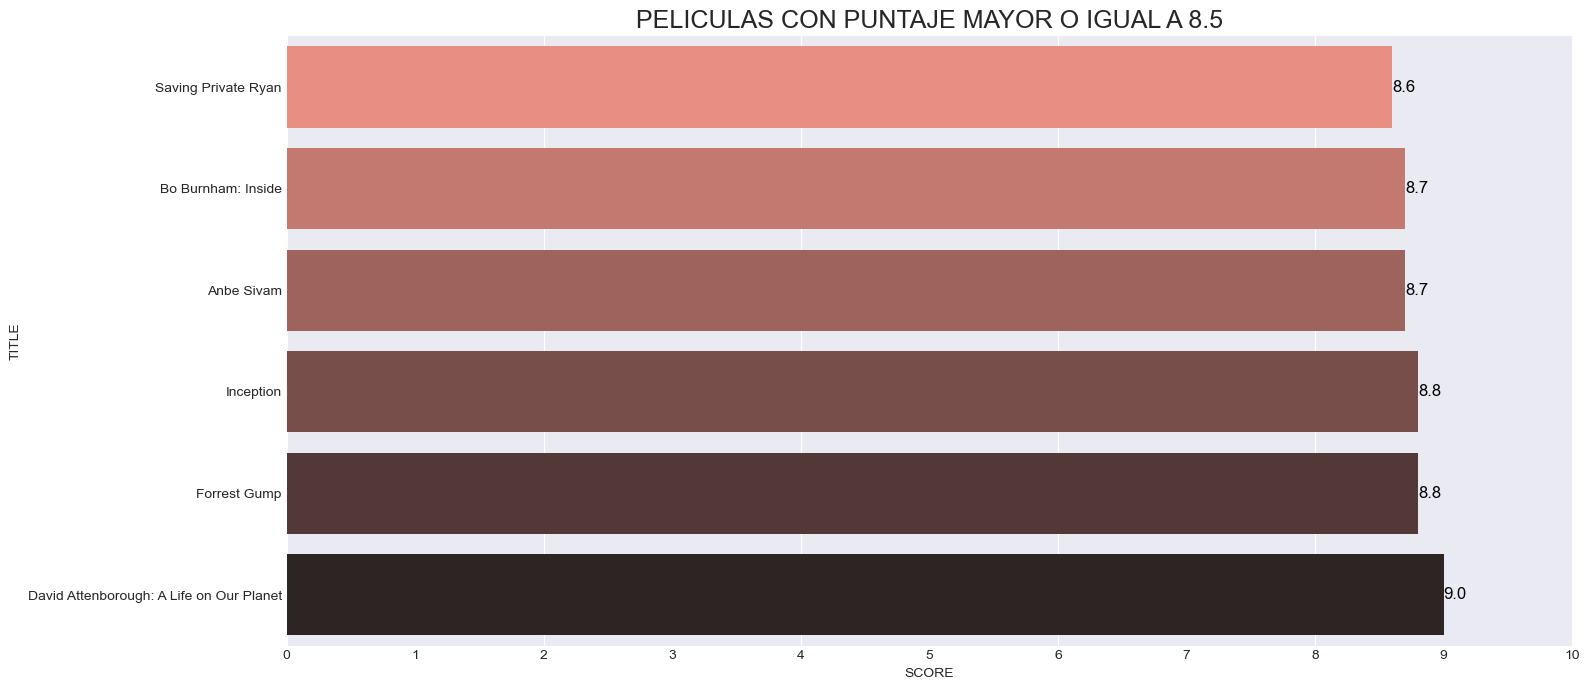

In [17]:
# Perzonalizar el el tamaño del axes con Matplolib
fig, ax = plt.subplots(figsize=(16, 7), tight_layout=True)


plot = sns.barplot(
    
    data = scores_greater_than_8,
    y = "TITLE",
    x = "SCORE",
    palette="dark:salmon_r",
    ax = ax);


# Agregar anotacion
annot_bar(plot, orient = {"numerico":0})


# Agregar un rango de etiquetas en el eje X
plot.set_xticks(np.arange(0, 11), np.arange(0, 11), minor=True,  );


# Agregar titulos
plt.title("PELICULAS CON PUNTAJE MAYOR O IGUAL A 8.5", fontsize = 18);

> La pelicual con el puntaje más alto es **David Attenborough: A Life on Our Planet**

## 2.5 ¿Cuáles son las películas producidas por la compañía de producción principal "Main Production"?

In [20]:
def grafico_barplot(df:pd.DataFrame, x:str, y:str, x_lenght:int=10, y_height:int=8, title:str="Titulo"):
    
    """
    La función grafico_barplot es una función que permite crear un gráfico de barras con la librería Seaborn a partir de un dataframe de Pandas.
    
    
    Los parámetros de la función son:

        df: Un dataframe de Pandas que contiene los datos a graficar.
        x: Nombre de la columna del dataframe que se utilizará como eje x.
        y: Nombre de la columna del dataframe que se utilizará como eje y.
        x_lenght: Ancho del gráfico en pulgadas. Valor por defecto: 10.
        y_height: Alto del gráfico en pulgadas. Valor por defecto: 8.
        title: Título del gráfico. Valor por defecto: "Título".
        La función crea un gráfico de barras con Seaborn, le asigna un título y devuelve el objeto Seaborn que representa el gráfico.
    
    
    """
    
    # Perzonalizar el el tamaño del axes con Matplolib
    fig, axs = plt.subplots(figsize=(x_lenght, y_height), tight_layout=True)

    
    # Crear grafico de barras con Seaborn
    plot = sns.barplot(
        data = df,
        y = y,
        x = x,
        palette="pastel",
        ax = axs
    );

    
    # Agregar titulos
    plot.set_title(title, fontsize = 18);
    
    return plot

In [22]:
# Diccionario de paises segun la abreviatura del dataset
countries = {'GB': 'United Kingdom', 'US': 'United States', 'DE': 'Germany', 'CA': 'Canada', 'NO': 'Norway', 'NZ': 'New Zealand', 'IN': 'India', 'JP': 'Japan', 'FR': 'France', 'HK': 'Hong Kong', 'ES': 'Spain', 'MX': 'Mexico', 'AU': 'Australia', 'KR': 'South Korea', 'CN': 'China', 'BE': 'Belgium', 'TR': 'Turkey', 'ZA': 'South Africa', 'HU': 'Hungary', 'PL': 'Poland', 'IE': 'Ireland', 'MW': 'Malawi', 'IT': 'Italy', 'LT': 'Lithuania', 'ID': 'Indonesia', 'DK': 'Denmark', 'XX': 'Unknown', 'TH': 'Thailand', 'KH': 'Cambodia', 'UA': 'Ukraine', 'BR': 'Brazil', 'PS': 'Palestine', 'NL': 'Netherlands', 'AR': 'Argentina', 'CD': 'Congo, Democratic Republic of the'}


# Creamos un DataFrame 
df_production_country = pd.DataFrame( 
    {
        "Country":df_best_movies_netflix["MAIN_PRODUCTION"].value_counts().index, 
        "Number of Production": df_best_movies_netflix["MAIN_PRODUCTION"].value_counts().values
    } 
)


# Mostaramos las 3 pirmeas filas del Dataframe
df_production_country.head(3)

,Country,Number of Production
0,US,157
1,IN,115
2,GB,29


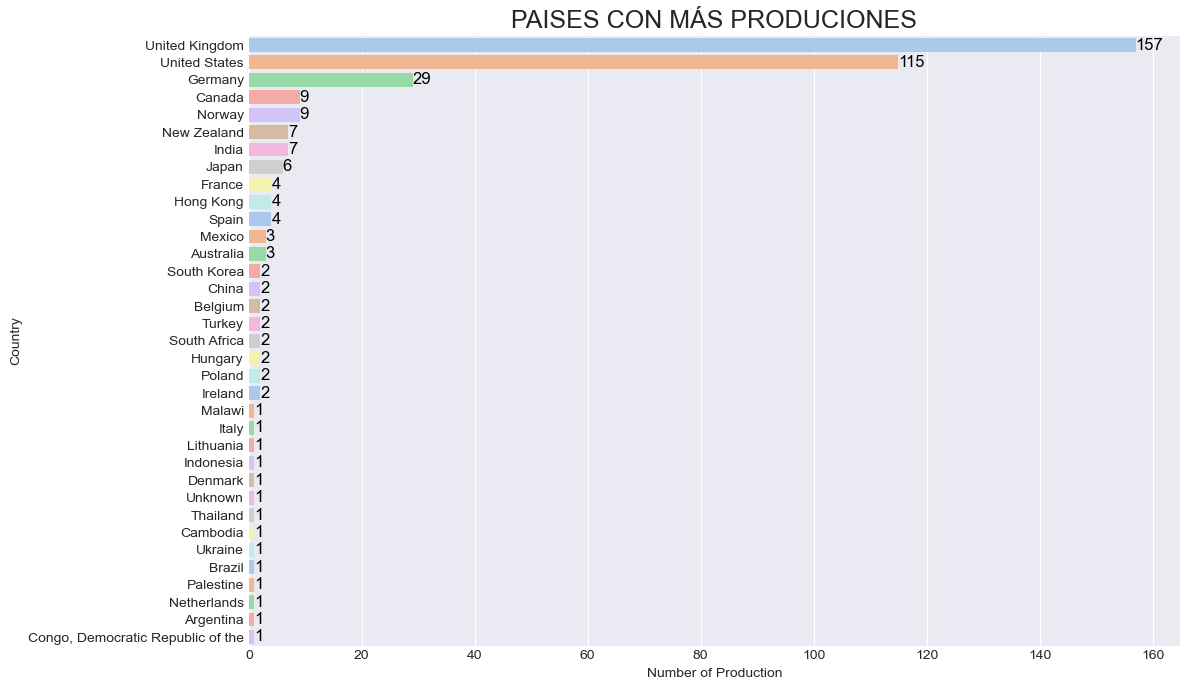

In [23]:
# Creamos grafico de barra con la funcion 'grafico_barplot()'
graphic = grafico_barplot(df=df_production_country, y="Country", x="Number of Production", title="PAISES CON MÁS PRODUCIONES", x_lenght = 12, y_height = 7);

# Cambiamos los tickes del eje Y
plt.yticks(ticks=range(len(countries)), labels=countries.values());

# Agregamos anotacion de tipo "Texto" a cada barra
annot_bar(graphic, {"texto":0});




## 2.5 ¿Cuáles son las películas del género principal "Comedia" en el dataset y su puntuacion?

Encontrar peliculas del genero **comedia**, y mostraremos el **top 5** segun su puntuancion.

In [59]:
top_drama_movies = df_best_movies_netflix[["TITLE", "SCORE", "MAIN_GENRE"]].query(expr="MAIN_GENRE == 'comedy' ")

# Organizamos el puntaje de forma desendente
top_drama_movies.sort_values(by = "SCORE", ascending = False, inplace = True)

top_drama_movies

,TITLE,SCORE,MAIN_GENRE
3,Anbe Sivam,8.7,comedy
4,Bo Burnham: Inside,8.7,comedy
11,3 Idiots,8.4,comedy
9,Louis C.K.: Hilarious,8.4,comedy
8,Bo Burnham: Make Happy,8.4,comedy
10,Dave Chappelle: Sticks & Stones,8.4,comedy
18,Bo Burnham: What.,8.3,comedy
28,Monty Python and the Holy Grail,8.2,comedy
26,PK,8.2,comedy
33,Bill Burr: Paper Tiger,8.1,comedy


**Graficar el Top 5** de mejores peliculas de **COMEDIA**

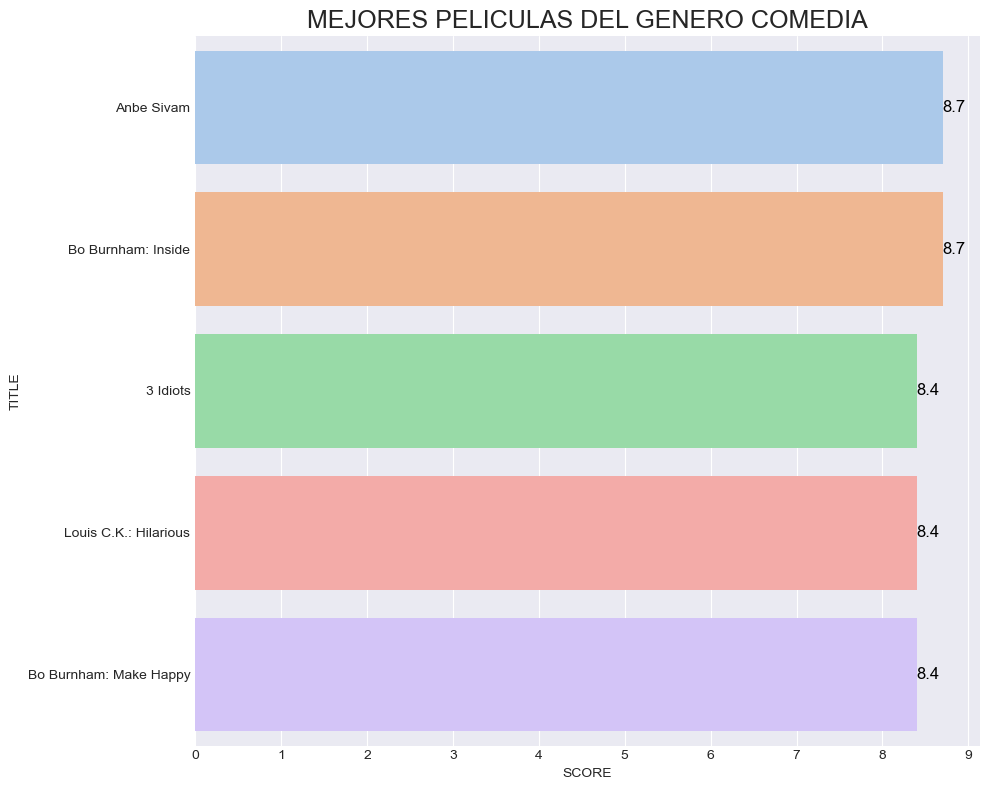

In [61]:
# LLamamos la funcione que definimos celdas atras.
plot = grafico_barplot(
    df = top_drama_movies.head(5),
    x_lenght = 10,
    y = "TITLE",
    x = "SCORE",
    title="MEJORES PELICULAS DEL GENERO COMEDIA"
);


# Cambiamos los tickers del eje X
plt.xticks(
    ticks = np.arange(0, 10),
    labels = np.arange(0, 10) 

);

# agreagar anotaciones a cada barra
annot_bar(plot, {"numerico": 0});


In [69]:
df_best_movies_netflix["RELEASE_YEAR"].min()


1954

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25a4b221-5a84-4fc8-b9c4-17d80d9774dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>